In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, xticks
%matplotlib inline

DATA_DIR = '.'

# Load Data

In [2]:
data = pd.DataFrame()

In [3]:
total_data = [500, 1000, 2500, 5000, 7500, 10981]

for x in total_data:
    data = pd.concat([
     data,   
     pd.read_csv('{}/final_prosa_yelp_XLM_R_result_combined_{}.csv'.format(DATA_DIR, x))
    ])

print(data.shape)
data.head()

(96, 7)


,tipe,total_data,foreign_mult,total_foreign_data,max_f1,max_recall,max_precision
0,A,500,0.25,0,0.494705,0.346154,0.517986
1,B,500,0.25,0,0.484829,0.245192,0.566667
2,C,500,0.25,125,0.489031,0.403846,0.497041
3,C,500,0.50,250,0.503168,0.442308,0.511111
4,C,500,0.75,375,0.507095,0.432692,0.517241


# Plot F1 By Total Data for each Type

In [4]:
# data.loc[(data['tipe'] == 'A') | (data['tipe'] == 'B'), 'foreign_mult'] = data[(data['tipe'] == 'A') | (data['tipe'] == 'B')].foreign_mult.apply(lambda x: 0)
data.loc[(data['tipe'] == 'A'), 'foreign_mult'] = data[(data['tipe'] == 'A')].foreign_mult.apply(lambda x: 0)
data.loc[(data['tipe'] == 'B'), 'foreign_mult'] = data[(data['tipe'] == 'B')].foreign_mult.apply(lambda x: -1)

In [5]:
data = data.sort_values(by=['total_data', 'foreign_mult'])
data.head(20)

,tipe,total_data,foreign_mult,total_foreign_data,max_f1,max_recall,max_precision
1,B,500,-1.00,0,0.484829,0.245192,0.566667
0,A,500,0.00,0,0.494705,0.346154,0.517986
2,C,500,0.25,125,0.489031,0.403846,0.497041
3,C,500,0.50,250,0.503168,0.442308,0.511111
4,C,500,0.75,375,0.507095,0.432692,0.517241
5,C,500,1.00,500,0.513416,0.461538,0.521739
6,C,500,1.50,750,0.525503,0.437500,0.541667
7,C,500,2.00,1000,0.527996,0.399038,0.557047
8,C,500,3.00,1500,0.571807,0.519231,0.586957
9,C,500,4.00,2000,0.643202,0.634615,0.650246


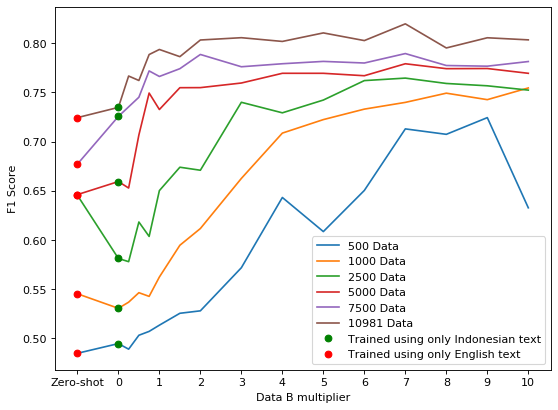

In [6]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

total_data = [500, 1000, 2500, 5000, 7500, 10981]

for x in total_data:
     plt.plot(data[(data['total_data'] == x )].foreign_mult.values,
        data[(data['total_data'] == x)].max_f1.values,
        
        label='{} Data'.format(x))
    
plt.plot(data[(data['tipe'] == 'A' )].foreign_mult.values,
data[(data['tipe'] == 'A')].max_f1.values,
'go',
label='Trained using only Indonesian text'.format(x))

plt.plot(data[(data['tipe'] == 'B' )].foreign_mult.values,
data[(data['tipe'] == 'B')].max_f1.values,
'ro',
label='Trained using only English text'.format(x))

xticks([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Zero-shot', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

plt.legend(loc="lower right")
plt.xlabel('Data B multiplier')
plt.ylabel('F1 Score')
plt.title('')
plt.savefig('plot.png')
plt.show()

# Plot all 9 experiment (by total data) side by side

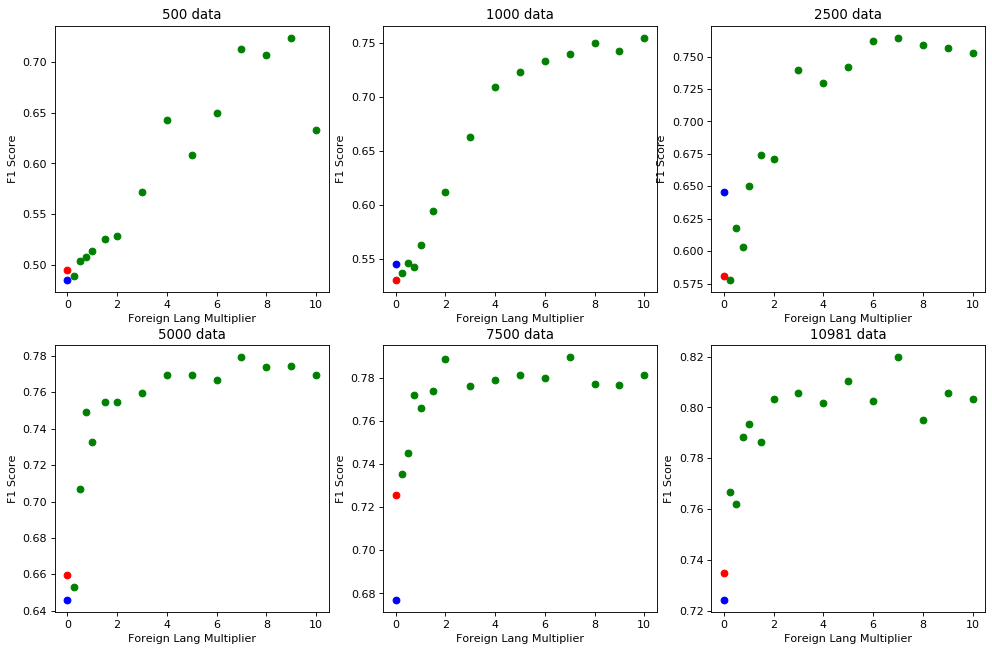

In [8]:
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
count_plot = 0
for x in total_data:
    count_plot += 1
    plt.subplot(3, 3, count_plot)
    final_result = data[data['total_data'] == x]
    
    plt.plot(np.zeros_like(final_result[final_result['tipe'] == 'A'].max_f1.values), 
             final_result[final_result['tipe'] == 'A'].max_f1.values, 'ro', label='A')

    plt.plot(np.zeros_like(final_result[final_result['tipe'] == 'B'].max_f1.values), 
             final_result[final_result['tipe'] == 'B'].max_f1.values, 'bo', label='B')

    plt.plot(final_result[final_result['tipe'] == 'C'].foreign_mult.values, 
             final_result[final_result['tipe'] == 'C'].max_f1.values, 'go', label='C')

#     plt.legend(loc="lower right")
    plt.xlabel('Foreign Lang Multiplier')
    plt.ylabel('F1 Score')
    plt.title('{} data'.format(x))

#     plt.figtext(.7, .4, "diff = {:.5f}".format(
#         final_result[final_result['tipe'] == 'C'].f1.values[0]
#         -
#         final_result[final_result['tipe'] == 'A'].f1.values[0]))

plt.show()